# [Project] Loyal Customer Segmentation and Identification

### Guideline
1. Data Import and Cleaning
2. First K Means Clustering
3. Second K means Clustering 
4. Decision Tree
5. Conclusion

## 1. Data Import and Cleaning

In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Limit numeric values to 2 decimal place
pd.options.display.float_format = '{:,.2f}'.format 

In [137]:
df = pd.read_csv('customers.csv')
df.head()

,customer_id,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews
0,6253,314.88,7.00,45.16,3.09,1.58,0.60
1,4685,109.57,3.00,42.13,6.40,6.80,1.00
2,1732,33.44,2.00,15.57,1.71,4.79,0.10
3,4743,503.94,10.00,52.18,6.12,5.67,1.80
4,4522,400.95,8.00,51.85,4.55,3.36,0.50


In [138]:
# Identify any null values
df.isnull().sum()

customer_id           0
total_spend           0
purchase_count        0
avg_order_value       0
avg_session_length    0
wishlist_adds         0
product_reviews       0
dtype: int64

In [139]:
# Brief check of whether outlier exists
df.describe()

,customer_id,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50",219.53,5.20,34.84,5.00,4.37,0.83
std,"2,886.90",232.36,3.50,17.83,3.22,3.66,0.70
min,1.00,-186.36,-6.00,2.31,-2.94,0.00,0.00
25%,"2,500.75",50.83,3.00,17.98,2.25,0.36,0.30
50%,"5,000.50",110.23,4.00,33.12,4.71,4.53,0.70
75%,"7,500.25",326.99,7.00,49.63,7.73,7.68,1.20
max,"10,000.00","1,270.84",19.00,84.27,13.77,10.00,4.40


In [140]:
# Drop rows with negative order values 
df = df[df['avg_order_value'] > 0]
df.describe()

,customer_id,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50",219.53,5.20,34.84,5.00,4.37,0.83
std,"2,886.90",232.36,3.50,17.83,3.22,3.66,0.70
min,1.00,-186.36,-6.00,2.31,-2.94,0.00,0.00
25%,"2,500.75",50.83,3.00,17.98,2.25,0.36,0.30
50%,"5,000.50",110.23,4.00,33.12,4.71,4.53,0.70
75%,"7,500.25",326.99,7.00,49.63,7.73,7.68,1.20
max,"10,000.00","1,270.84",19.00,84.27,13.77,10.00,4.40


### Standard Scaling
Standard Scaling applied to normalize feature values and ensure all features contribute equally to distance calculations during clustering

In [141]:
features = df.columns.drop('customer_id')
features

Index(['total_spend', 'purchase_count', 'avg_order_value',
       'avg_session_length', 'wishlist_adds', 'product_reviews'],
      dtype='object')

In [142]:
X = df[features]

# Apply Standard Scaling
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Check if features are scaled properly (mean ≈ 0, std ≈ 1)
X_scaled_df.describe()

,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-3.20,-1.82,-2.46,-1.19,-1.19
25%,-0.73,-0.63,-0.95,-0.85,-1.10,-0.76
50%,-0.47,-0.34,-0.10,-0.09,0.04,-0.19
75%,0.46,0.52,0.83,0.85,0.90,0.53
max,4.52,3.95,2.77,2.72,1.54,5.11


## 2. First K Means Clustering

#### Identifying optimal number of clusters (k) through Elbow Method 

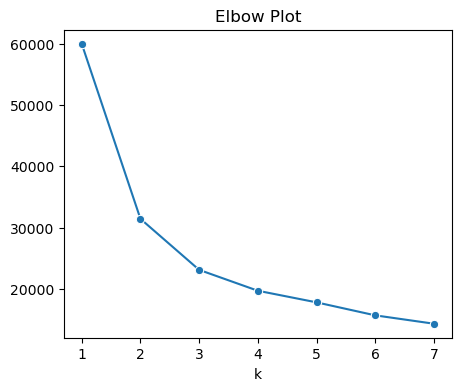

In [143]:
inertias = []

for k in range(1, 8): 
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X_scaled_df)
    inertias.append(model.inertia_)

# Plot to decide optimal K 
plt.figure(figsize=(5,4))
sns.lineplot(x=range(1,8), y=inertias, marker='o') 
plt.title('Elbow Plot')
plt.xlabel('k')
plt.show()

**Optimal k is found at 3**, where significant decrease in inertia occurs. 

#### K Means Clustering

In [165]:
optimal_k = 3 
model = KMeans(n_clusters=optimal_k, random_state=123)
model.fit(X_scaled_df) 

X_scaled_df['cluster1'] = model.predict(X_scaled_df) # For visualization
df['cluster1'] = model.predict(X_scaled_df) # To interpret the results of cluster 

In [164]:
# Group by cluster and calculate mean of all features, and the customer count 
cluster_summary = df.drop(columns=['customer_id']).groupby('cluster1').agg(['count', 'mean']).round(2)
# Display the result
cluster_summary

total_spend        purchase_count       avg_order_value        \
               count   mean          count  mean           count  mean   
cluster1                                                                 
0               2010 615.10           2010 10.53            2010 58.68   
1               4415  57.89           4415  3.05            4415 18.85   
2               3575 196.74           3575  4.86            3575 41.19   

         avg_session_length      wishlist_adds      product_reviews       
                      count mean         count mean           count mean  
cluster1                                                                  
0                      2010 8.75          2010 8.45            2010 0.87  
1                      4415 2.06          4415 0.85            4415 0.82  
2                      3575 6.52          3575 6.43            3575 0.83

We see that cluster 0 is a group of customers with higher spending, purchase frequency, and engagement.

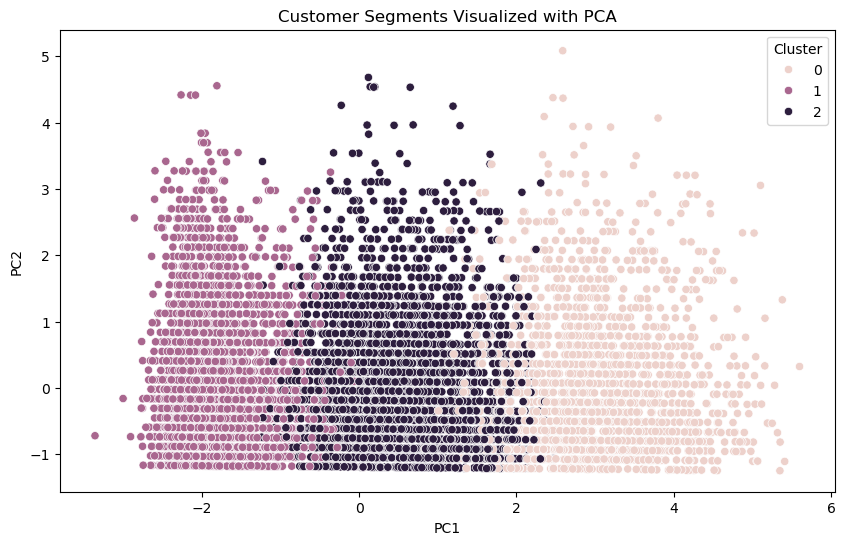

In [158]:
# Visualizing clusters using reduced dimensions through PCA 
pca = PCA(n_components=2) #reduce features to 2 dimensions
X_pca = pca.fit_transform(X_scaled_df.drop('cluster1', axis=1))
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster1'] = X_scaled_df['cluster1'] 

# Plot the based on reduced clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster1')
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

We do observe 3 distinct clusters, with **cluster 0 overindexing on PC1.**

In [153]:
# Show the contribution of each feature to the principal components (i.e. eigenvectors) 
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_scaled_df.drop('cluster1', axis=1).columns,
    index=['PC1', 'PC2']
)

pca_components.T.sort_values(by='PC1', ascending=False)

,PC1,PC2
total_spend,0.47,-0.01
avg_order_value,0.46,-0.00
wishlist_adds,0.45,-0.00
avg_session_length,0.45,-0.00
purchase_count,0.42,-0.01
product_reviews,0.01,1.00


**As shown by the feature contributions to PC1, this component primarily captures customer purchase behavior and engagement, confirming that cluster 0 consists of high spending and highly engaged customers.**

## 3. Second K Means Cluster

While cluster 0 consists of high-spending and highly engaged customers, **there are some overlap with cluster 1.** 

**To isolate the truly loyal customers,** a second clustering analysis is done on customers within cluster 0.

In [178]:
df2 = df[df['cluster1'] == 0]
df2.shape

(2010, 8)

In [179]:
X2 = df2[features]

# Apply Standard Scaling
X_scaled2 = std_scaler.fit_transform(X2)
X_scaled2_df = pd.DataFrame(X_scaled2, columns=features)

# Check if features are scaled properly (mean ≈ 0, std ≈ 1)
X_scaled2_df.describe()

,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews
count,"2,010.00","2,010.00","2,010.00","2,010.00","2,010.00","2,010.00"
mean,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.77,-2.25,-3.95,-4.15,-5.14,-1.20
25%,-0.80,-0.62,-0.61,-0.60,-0.60,-0.78
50%,-0.18,-0.22,0.05,0.07,0.24,-0.23
75%,0.66,0.60,0.68,0.69,0.95,0.45
max,3.91,3.44,2.81,2.79,0.95,4.86


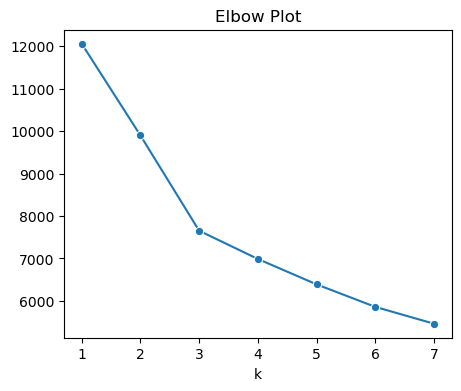

In [180]:
# Find optimal K with Elbow method 
inertias = []

for k in range(1, 8): 
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X_scaled2_df)
    inertias.append(model.inertia_)

# Plot to decide optimal K 
plt.figure(figsize=(5,4))
sns.lineplot(x=range(1,8), y=inertias, marker='o') 
plt.title('Elbow Plot')
plt.xlabel('k')
plt.show()

Again, optimal K is found at 3

In [184]:
optimal_k = 3 
model = KMeans(n_clusters=optimal_k, random_state=123)
model.fit(X_scaled2_df) 

In [185]:
X_scaled2_df['cluster2'] = model.predict(X_scaled2_df) # For visualization
df2['cluster2'] = model.predict(X_scaled2_df) # To interpret the results of cluster 

In [186]:
# Group by cluster and calculate mean of all features, and the customer count 
cluster_summary_2 = df2.drop(columns=['customer_id']).groupby('cluster2').agg(['count', 'mean']).round(2)
# Display the result
cluster_summary_2

total_spend        purchase_count       avg_order_value        \
               count   mean          count  mean           count  mean   
cluster2                                                                 
0                324 511.63            324 10.52             324 49.71   
2               1686 634.99           1686 10.54            1686 60.40   

         avg_session_length      wishlist_adds      product_reviews       \
                      count mean         count mean           count mean   
cluster2                                                                   
0                       324 6.52           324 6.11             324 0.94   
2                      1686 9.18          1686 8.90            1686 0.86   

         cluster1       
            count mean  
cluster2                
0             324 0.00  
2            1686 0.00

Although elbow method 3 clusters, the clustering results only identified 2 meaningful clusters, where cluster 2 overindexing in higher purchase and engagement. 

**Thus, the 1,686 customers in cluster 2 can be classified as true loyal customers based on their high engagement and spending behavior.**

## 4. Decision Tree

Having identified the 'true loyal customers,' the next step is to apply a decision tree to develop clear, **actionable business rules for generating a weekly list of loyal customers eligible for targeted offers.**

In [219]:
final_loyal_cust_list = df2[df2['cluster2'] == 2]['customer_id'].tolist()
print(f"Final Loyal Customer Count = {len(final_loyal_cust_list)}")

# Create target variable based on final loyal customer list generated 
# df = df.drop('cluster1', axis=1)
df['is_loyal_customer'] = df['customer_id'].isin(final_loyal_cust_list).astype(int)
df['is_loyal_customer'].value_counts()

Final Loyal Customer Count = 1686


is_loyal_customer
0    8314
1    1686
Name: count, dtype: int64

In [221]:
# Double Check target variable has been created 
df.head()

,customer_id,total_spend,purchase_count,avg_order_value,avg_session_length,wishlist_adds,product_reviews,is_loyal_customer
0,6253,314.88,7.00,45.16,3.09,1.58,0.60,0
1,4685,109.57,3.00,42.13,6.40,6.80,1.00,0
2,1732,33.44,2.00,15.57,1.71,4.79,0.10,0
3,4743,503.94,10.00,52.18,6.12,5.67,1.80,0
4,4522,400.95,8.00,51.85,4.55,3.36,0.50,0


In [226]:
y = df['is_loyal_customer']
X = df.drop(['customer_id', 'is_loyal_customer'], axis=1)

# Split Train / Test Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Decision tree model train 
classifier = DecisionTreeClassifier(
    max_depth=3,
    class_weight='balanced', # Added because the data is not balanced (majority of customers are non loyal customers) 
    random_state=123
)
classifier.fit(X_train, y_train)

# Predict for model evaluation 
y_pred = classifier.predict(X_test)

#### Model Evaluation 

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1640
           1       0.82      0.99      0.90       360

    accuracy                           0.96      2000
   macro avg       0.91      0.97      0.94      2000
weighted avg       0.97      0.96      0.96      2000



The model has an accuracy of 96%. While the precision for loyal customers is 0.82, suggesting some non loyal customers may be misclassified as loyal, the recall of 0.99 indicates nearly all true loyal customers are correctly identified.

Since the primary goal is to target loyal customers for promotions, **minimizing false negatives (missing true loyal customers) is more critical than minimizing false positives**. Therefore, the model performance is well suited to continue.

#### Business Rule Identification

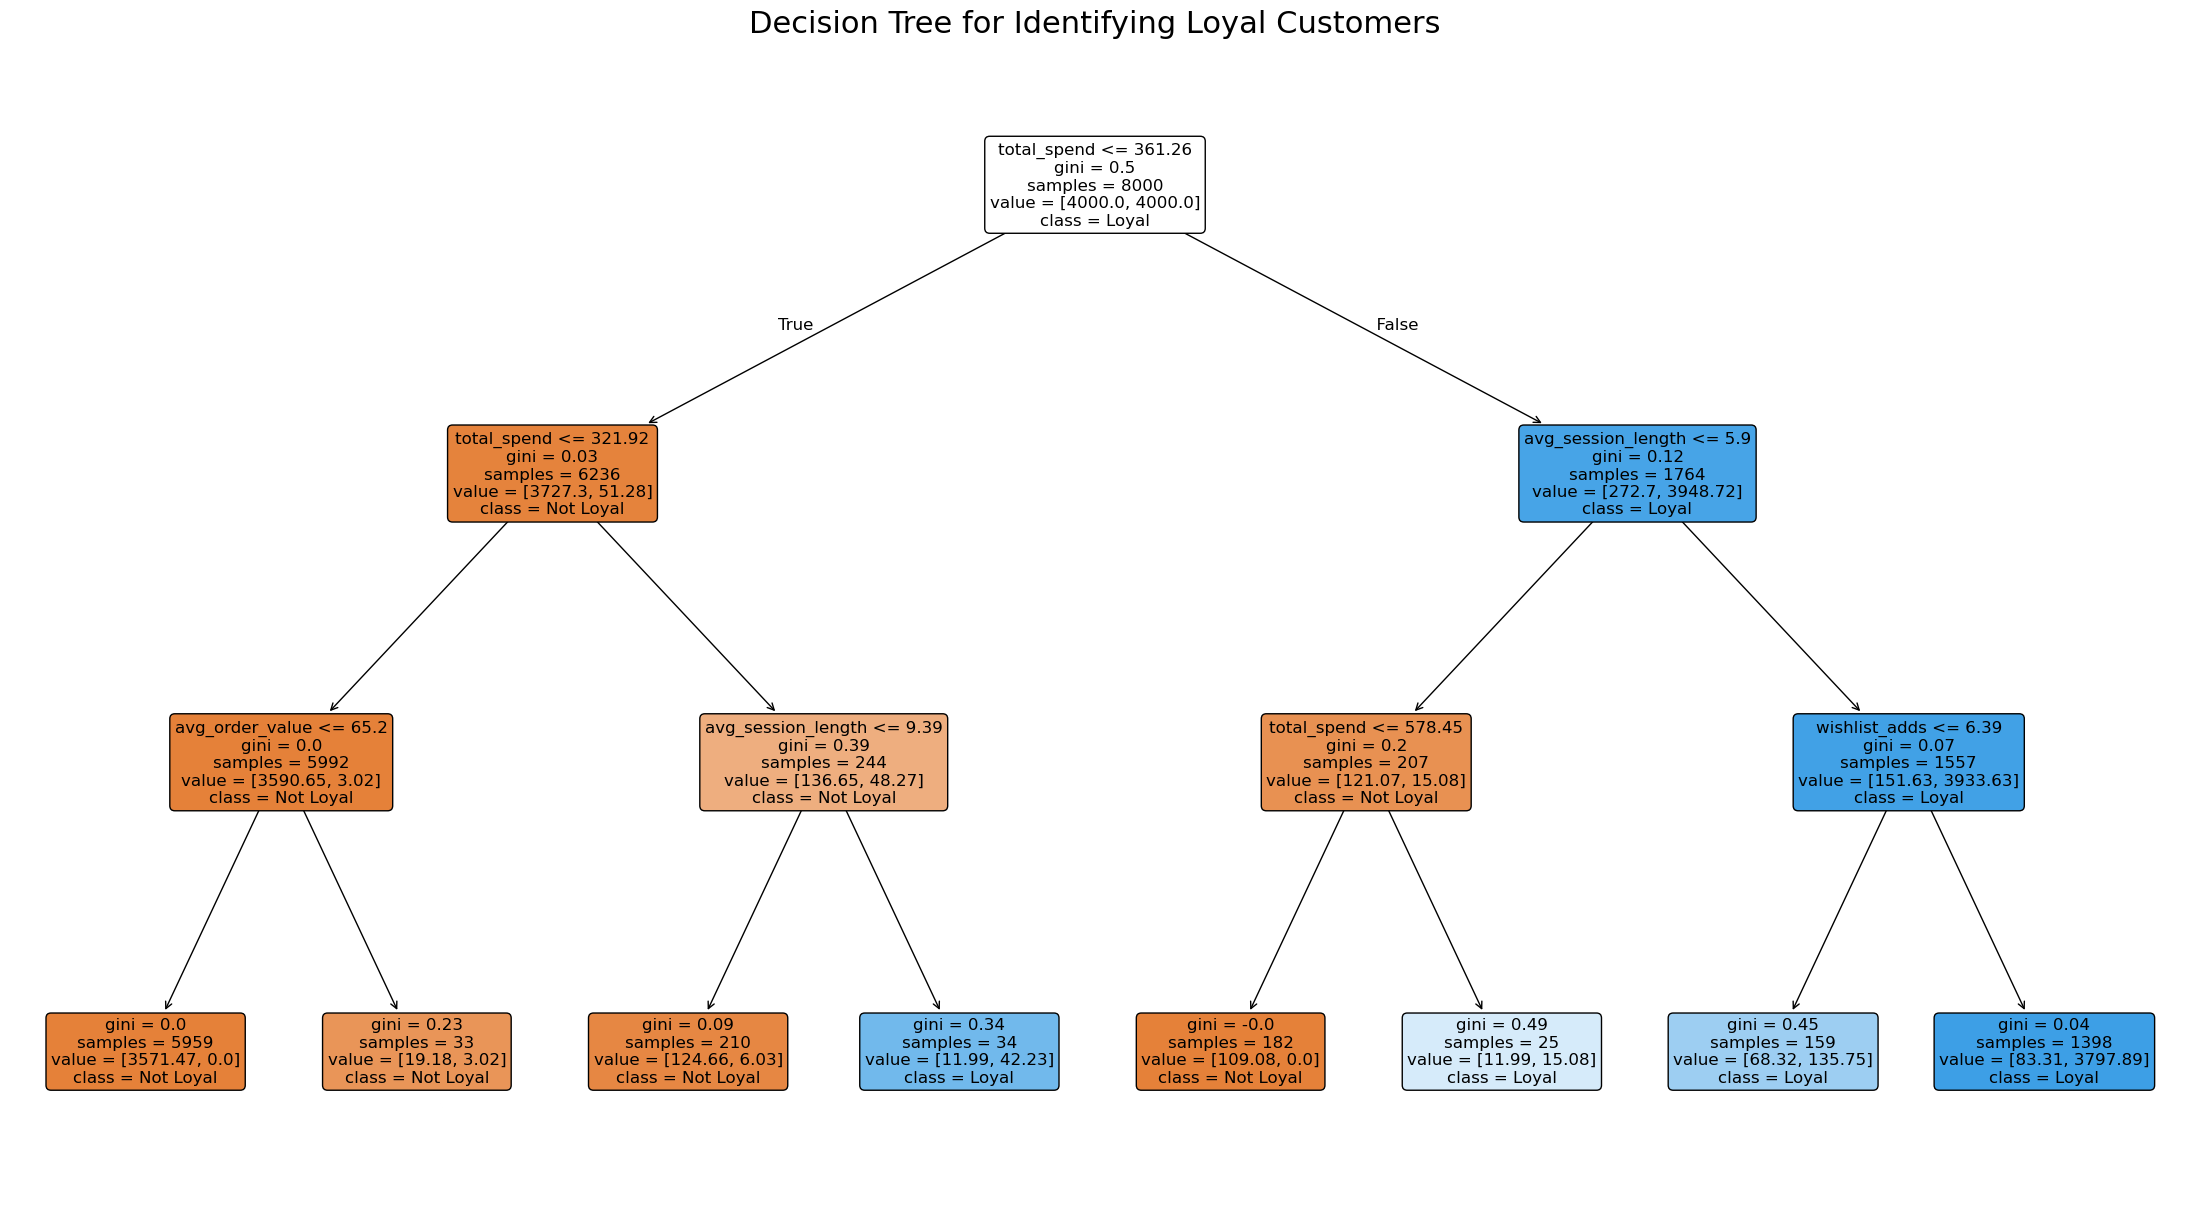

In [233]:
# Visualization of tree and thresholds

plt.figure(figsize=(28, 15))
plot_tree(
    classifier,  
    feature_names=X.columns,   
    class_names=['Not Loyal', 'Loyal'],  
    filled=True,
    rounded=True,
    fontsize=12,
    precision=2  
)
plt.title("Decision Tree for Identifying Loyal Customers", fontsize=22)
plt.show()

## 5. Conclusion

Business team can leverage the thresholds below to identify loyal customers for targeted offers:
   - **avg weekly spend > 61.26**
   - **avg session length > 5.90**
   - **avg wishlist added item > 6.39**

By applying these business rules, the team can efficiently select customers each week to send out the offers for loyal customers.